In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import altair as alt
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("data.csv")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['id', 'artists', 'release_date', 'name', 'popularity'])
y = df[['popularity']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y_test

,popularity
71175,42
17043,15
113335,1
166262,30
172624,0
...,...
167489,30
89161,38
56128,56
7024,22


In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
X_train.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
93560,0.390,0.882,161627,0.689,0,0.00325,6,0.0501,-4.027,1,0.1240,97.963,0.746,2019
60601,0.976,0.810,127293,0.293,0,0.83000,6,0.1540,-13.960,0,0.2990,109.020,0.896,1939
61023,0.840,0.500,147453,0.600,0,0.24300,0,0.1050,-13.027,1,0.0351,88.239,0.657,1942
171326,0.307,0.773,166933,0.570,0,0.00259,7,0.0865,-11.631,1,0.0314,109.392,0.765,2006
44692,0.909,0.663,184133,0.240,0,0.00000,2,0.2210,-14.058,1,0.0378,102.878,0.598,1952


In [6]:
print(lr.score(X_test, y_test))
preds = lr.predict(X_test)

0.3697423097849074


In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, preds, squared = False)

17.365881074043326

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr =  RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.680576965620918

In [9]:
preds = rfr.predict(X_test)
mean_squared_error(y_test, preds, squared = False)

12.362914372679402

In [10]:
df = pd.read_csv("data.csv")

In [11]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
df['artists'] = df['artists'].apply(lambda x: x[1:len(x)-1])
art = df[['artists']]
enc = OrdinalEncoder()
enc.fit(art)
art = enc.transform(art)
df['artists'] = art

df['popular_artist'] = df['artists'].map(df['artists'].value_counts()>100)
tf = df[['popular_artist']]
enc = OrdinalEncoder()
enc.fit(tf)
tf = enc.transform(tf)
df['popular_artist'] = tf


todatetime = pd.to_datetime(df['release_date'])
todatetime = todatetime.apply(lambda x: x.year *31556952 + x.month * 2629746 + x.day * 86400)
df['release_date'] = todatetime

'''
Implementing two promising features from the EDA
'''
df['number_of_songs_by_artist'] = df['artists'].map(df['artists'].value_counts())
df['artist_popularity'] = df['artists'].map(df.groupby('artists')['popularity'].mean())

In [12]:
ohe = OneHotEncoder().fit_transform(df[['key']])
ohe = pd.DataFrame.sparse.from_spmatrix(ohe)
key_dropped_df = pd.concat([df, ohe], axis = 1)
key_dropped_df.columns

Index([             'acousticness',                   'artists',
                    'danceability',               'duration_ms',
                          'energy',                  'explicit',
                              'id',          'instrumentalness',
                             'key',                  'liveness',
                        'loudness',                      'mode',
                            'name',                'popularity',
                    'release_date',               'speechiness',
                           'tempo',                   'valence',
                            'year',            'popular_artist',
       'number_of_songs_by_artist',         'artist_popularity',
                                 0,                           1,
                                 2,                           3,
                                 4,                           5,
                                 6,                           7,
                         

In [13]:
X = key_dropped_df.drop(columns = ['id', 'name', 'key', 'popularity'])
y = key_dropped_df[['popularity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y_test

,popularity
71175,42
17043,15
113335,1
166262,30
172624,0
...,...
167489,30
89161,38
56128,56
7024,22


In [14]:
rfr =  RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

# 0.662474333671845
# 0.662474333671845
# 0.6824123174412566

0.8807737688732998

In [15]:
# preds = rfr.predict(X_test)
# mean_squared_error(y_test, preds, squared = False)

#11.843332399741225
#11.766637619839612
#11.488209373037495

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
base_model =  ExtraTreesRegressor()
base_model.fit(X_train, y_train)
base_model.score(X_test, y_test)
#0.6859308980424028

0.8775157873239074

In [17]:
preds = base_model.predict(X_test)
mean_squared_error(y_test, preds, squared = False)
#11.424392705050261

7.655574783172468

In [18]:
etr =  ExtraTreesRegressor(n_estimators = 10)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.865180589844295

In [19]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

8.0074881761747

In [20]:
etr =  ExtraTreesRegressor(n_estimators = 1000)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.8762016400528314

In [21]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

7.6732180606246345

In [22]:
etr =  ExtraTreesRegressor(n_estimators = 2500)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.8762470341586974

In [23]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

7.671811132418244

In [24]:
etr =  ExtraTreesRegressor(max_depth = 32)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.87502059017242

In [25]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

7.709732847930241

In [26]:
etr =  ExtraTreesRegressor(max_depth = 64)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.8749895144578164

In [27]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

7.710691288071709

In [28]:
etr =  ExtraTreesRegressor(max_depth = 128)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.874888166328563

In [29]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

7.713816249196003

In [30]:
etr =  ExtraTreesRegressor(min_samples_leaf = 2)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.8793799290961799

In [31]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

7.574079937700326

In [32]:
etr =  ExtraTreesRegressor(min_samples_leaf = 3)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.8815522544421439

In [33]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

7.5055667946525615

In [34]:
etr =  ExtraTreesRegressor(min_samples_leaf = 4)
etr.fit(X_train, y_train)
etr.score(X_validation, y_validation)

0.8821922098082859

In [35]:
preds = etr.predict(X_validation)
mean_squared_error(y_validation, preds, squared = False)

7.485263609106182

In [36]:
best_n_estimator = 1000
best_max_depth = 32
best_min_samples = 2
best_model =  ExtraTreesRegressor(n_estimators = best_n_estimator,  max_depth = best_max_depth, 
                           min_samples_leaf = best_min_samples )
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.88273688865504

In [37]:
predictions = best_model.predict(X_test)
mean_squared_error(y_test, predictions, squared = False)

7.4906318412113855

In [38]:
test_frame = pd.DataFrame(y_test).reset_index(drop = True)
pred_frame = pd.DataFrame(predictions)
line_frame = pd.concat([test_frame, pred_frame], axis = 1)
differences = line_frame['popularity'] - line_frame[0]

Text(0, 0.5, 'Difference')

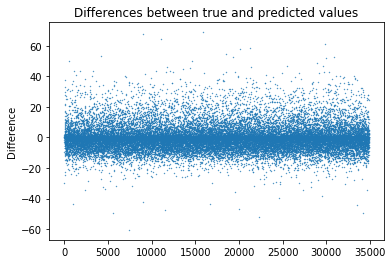

In [39]:
graph =plt.plot(differences,marker = '.', linestyle='', markersize= .75 )
plt.title('Differences between true and predicted values')
plt.ylabel("Difference")

Text(0.5, 1.0, 'Predictions vs True Value Scatter Plot')

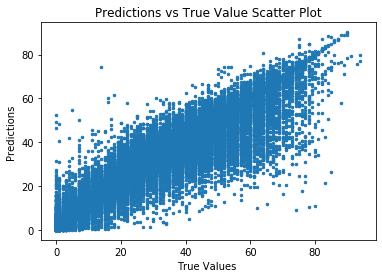

In [40]:
g=plt.scatter(y_test, predictions, marker = '.', s = 25 )
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
plt.title("Predictions vs True Value Scatter Plot")


In [41]:
# from sklearn.model_selection import GridSearchCV
# params = {'n_estimators': [10, 100, 1000, 2500] , 'max_depth': [32, 64, 128],
#          'min_samples_leaf': [1,2,3,4]}
# clf = GridSearchCV(ExtraTreesRegressor(), params)
# clf.fit(X_train, y_train)
# clf.score(X_validation, y_validation)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X_train, y_train, scoring='neg_mean_squared_error')

In [ ]:
rmse = (-scores)**0.5 
rmse

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
mor = MultiOutputRegressor(RandomForestRegressor())
mor.fit(X_train, y_train)
mor.score(X_test, y_test)

#0.6474719821669344

In [ ]:
preds = mor.predict(X_test)
mean_squared_error(y_test, preds, squared = False)

#12.093398326700845

In [ ]:
from sklearn.neural_network import MLPRegressor
mor = MLPRegressor()
mor.fit(X_train, y_train)
mor.score(X_test, y_test)

#0.315353445903906

In [ ]:
preds = mor.predict(X_test)
mean_squared_error(y_test, preds, squared = False)

#16.853292234713926

In [ ]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

#0.2697080630292681

In [ ]:
preds = svr.predict(X_test)
mean_squared_error(y_test, preds, squared = False)

#17.40603253680823

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

#-6.035643027814149e+26

In [ ]:
preds = sgd.predict(X_test)
mean_squared_error(y_test, preds, squared = False)

#500395402813403.3

In [ ]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

#0.3133138753212047

In [ ]:
preds = regr.predict(X_test)
mean_squared_error(y_test, preds, squared = False)

#16.878376650287947

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
abr = AdaBoostRegressor(GradientBoostingRegressor())
abr.fit(X_train, y_train)
abr.score(X_test, y_test)

#0.5673236267954871

In [ ]:
preds = abr.predict(X_test)
mean_squared_error(y_test, preds, squared = False)

#12.214633364282637

In [ ]:
abr = AdaBoostRegressor(RandomForestRegressor())
abr.fit(X_train, y_train)
abr.score(X_test, y_test)

#0.6403684415344134

In [ ]:
preds = abr.predict(X_test)
mean_squared_error(y_test, preds, squared = False)

#12.214633364282637

In [75]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture()
gm.fit(X_train, y_train)
gm.score(X_test, y_test)
#-35.85604248352924

-35.85604248352924

In [76]:
predictions = gm.predict(X_test)
mean_squared_error(y_test, predictions, squared = False)
#37.67080298225442

37.67080298225442